In [1]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [3]:
#cross validation
from sklearn.model_selection import train_test_split

In [4]:
#data
rawData = pd.read_csv('export_newdataframe.csv', header=0)
rawData.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,age_disc,limit_bal_disc_8
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,689,0,0,0,0,1,0,0
1,2,2,2,-1,2,0,0,0,2,2682,...,3261,0,1000,1000,1000,0,2000,1,0,0
2,2,2,2,0,0,0,0,0,0,29239,...,15549,1518,1500,1000,1000,1000,5000,0,1,0
3,2,2,1,0,0,0,0,0,0,46990,...,29547,2000,2019,1200,1100,1069,1000,0,1,0
4,1,2,1,-1,0,-1,0,0,0,8617,...,19131,2000,36681,10000,9000,689,679,0,3,0


In [5]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                      30000 non-null int64
PAY_AMT2                      30000 non-null int64
PAY_AMT3                

In [5]:
Data=rawData.drop(columns=['default payment next month']).assign(default_payment_next_month=rawData['default payment next month'])

In [9]:
Data.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_disc,limit_bal_disc_8,default_payment_next_month
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,689,0,0,0,0,0,0,1
1,2,2,2,-1,2,0,0,0,2,2682,...,3261,0,1000,1000,1000,0,2000,0,0,1
2,2,2,2,0,0,0,0,0,0,29239,...,15549,1518,1500,1000,1000,1000,5000,1,0,0
3,2,2,1,0,0,0,0,0,0,46990,...,29547,2000,2019,1200,1100,1069,1000,1,0,0
4,1,2,1,-1,0,-1,0,0,0,8617,...,19131,2000,36681,10000,9000,689,679,3,0,0


In [6]:
#features
features = Data.iloc[:,0:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_disc,limit_bal_disc_8
0,2,2,1,2,2,-1,-1,-2,-2,3913,...,0,0,0,689,0,0,0,0,0,0
1,2,2,2,-1,2,0,0,0,2,2682,...,3455,3261,0,1000,1000,1000,0,2000,0,0
2,2,2,2,0,0,0,0,0,0,29239,...,14948,15549,1518,1500,1000,1000,1000,5000,1,0
3,2,2,1,0,0,0,0,0,0,46990,...,28959,29547,2000,2019,1200,1100,1069,1000,1,0
4,1,2,1,-1,0,-1,0,0,0,8617,...,19146,19131,2000,36681,10000,9000,689,679,3,0


In [7]:
#dependent variable
depVar = Data['default_payment_next_month']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features, depVar, test_size=0.3)

In [10]:
X_train.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,age_disc,limit_bal_disc_8
29494,1,1,2,0,0,0,0,0,0,71944,...,113156,121465,19246,11550,11688,12122,12156,2437,1,2
20867,1,2,1,1,2,2,2,2,0,17920,...,19422,3644,1900,0,2000,0,500,500,1,1
3015,1,1,1,-2,-2,-1,0,0,-2,16459,...,884,9924,941,44743,0,884,9924,10824,1,2
1122,1,2,2,0,0,0,0,0,0,48221,...,49780,49980,2571,1200,1000,40000,1000,0,0,0
2443,2,3,1,1,2,0,0,0,0,30607,...,29068,30383,10,2000,2000,2000,2000,3000,2,0


In [16]:
X_train_count=len(X_train.index)

In [17]:
print(X_train_count)

21000


In [18]:
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


2817     1
1229     0
132      0
3058     0
21494    1
Name: default_payment_next_month, dtype: int64

In [19]:
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 9000
       SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
12017    2          2         1      2      0      0      2      2      2   
18974    2          1         2      0      0      0      0      0      0   
3036     1          1         2     -1     -1     -1     -1     -1     -1   
15127    1          2         2      0      0      0      0      0      0   
11711    1          2         2      0      0     -1     -1      0      0   

       BILL_AMT1  ...  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
12017      10992  ...      15917      15514      1540      3750       700   
18974      28989  ...      70000     100000      1291     11000     12288   
3036         396  ...        792      68095       396       396         0   
15127      74040  ...      48350      47208      3500      2500      2000   
11711      61606  ...      24487      17624      5000       200     52399   

       PAY_

In [20]:
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 9000


12017    1
18974    0
3036     0
15127    0
11711    0
Name: default_payment_next_month, dtype: int64

In [9]:
X_train.shape, X_test.shape

((21000, 23), (9000, 23))

In [10]:
#estimators for classification
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn import tree


In [12]:
from sklearn import neighbors


In [13]:
from sklearn import svm

In [14]:
#Classification Models
modelRF=RandomForestClassifier()
modelDT=tree.DecisionTreeClassifier()
modelKNN=neighbors.KNeighborsClassifier()
modelSVM=svm.SVC()

In [22]:
modelDT=tree.DecisionTreeClassifier()

In [17]:
modelKNN=neighbors.KNeighborsClassifier()

In [16]:
modelSVM=svm.SVC()

In [23]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80345665 0.80757143 0.8026861 ]


0.9752380952380952

In [40]:
modelRF100=RandomForestClassifier(n_estimators=100)
modelRF100.fit(X_train,y_train)
print(cross_val_score(modelRF100, X_train, y_train))
modelRF100.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81474075 0.81528571 0.8096871 ]


0.9937619047619047

In [41]:
modelRF50=RandomForestClassifier(n_estimators=50)
modelRF50.fit(X_train,y_train)
print(cross_val_score(modelRF50, X_train, y_train))
modelRF50.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.81316955 0.81542857 0.80940134]


0.9934761904761905

In [21]:
modelRF4=RandomForestClassifier(max_features=4)
modelRF4.fit(X_train,y_train)
print(cross_val_score(modelRF4, X_train, y_train))
modelRF4.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.80602771 0.80071429 0.81025861]


0.9735714285714285

In [34]:
modelDT.fit(X_train,y_train)
print(cross_val_score(modelDT, X_train, y_train))
modelDT.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.72561063 0.72514286 0.72853265]


0.9937619047619047

In [42]:
modelDTrs=tree.DecisionTreeClassifier(random_state=0)
modelDTrs.fit(X_train,y_train)
print(cross_val_score(modelDTrs, X_train, y_train))
modelDTrs.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.72961006 0.718      0.72667524]


0.9937619047619047

In [23]:
modelDT4=tree.DecisionTreeClassifier(max_depth=4)
modelDT4.fit(X_train,y_train)
print(cross_val_score(modelDT4, X_train, y_train))
modelDT4.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.8168833  0.823      0.81997428]


0.8243809523809524

In [15]:
modelKNN.fit(X_train,y_train)
print(cross_val_score(modelKNN, X_train, y_train))
modelKNN.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75246393 0.752      0.75610802]


0.8172380952380952

In [16]:
modelKNN5=neighbors.KNeighborsClassifier(n_neighbors=5)
modelKNN5.fit(X_train,y_train)
print(cross_val_score(modelKNN5, X_train, y_train))
modelKNN5.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75246393 0.752      0.75610802]


0.8172380952380952

In [18]:
modelKNN10=neighbors.KNeighborsClassifier(n_neighbors=10)
modelKNN10.fit(X_train,y_train)
print(cross_val_score(modelKNN10, X_train, y_train))
modelKNN10.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78174546 0.77685714 0.78054008]


0.7971904761904762

In [18]:
modelKNN2=neighbors.KNeighborsClassifier(p=2)
modelKNN2.fit(X_train,y_train)
print(cross_val_score(modelKNN2, X_train, y_train))
modelKNN2.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75246393 0.752      0.75610802]


0.8172380952380952

In [36]:
modelSVM.fit(X_train,y_train)
print(cross_val_score(modelSVM, X_train, y_train))
modelSVM.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.78174546 0.78157143 0.77982569]


0.9881904761904762

In [46]:
modelSVMbal=svm.SVC(class_weight='balanced')
modelSVMbal.fit(X_train,y_train)
print(cross_val_score(modelSVMbal, X_train, y_train))
modelSVMbal.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.77688902 0.77414286 0.77025289]


0.9808571428571429

In [48]:
modelSVMrs=svm.SVC(random_state=1)
modelSVMrs.fit(X_train,y_train)
print(cross_val_score(modelSVMrs, X_train, y_train))
modelSVMrs.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.78174546 0.78157143 0.77982569]


0.9881904761904762

In [19]:
#Make Predictions
predictionsRF = modelRF.predict(X_test)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [20]:
from sklearn.metrics import accuracy_score

In [56]:
print("RF accuracy : ",accuracy_score(y_test, predictionsRF, normalize = True))

RF accuracy :  0.8022222222222222


In [57]:
predictionsDT = modelDT.predict(X_test)
print("DT accuracy : ",accuracy_score(y_test, predictionsDT, normalize = True))

DT accuracy :  0.7316666666666667


In [24]:
predictionsDT4 = modelDT4.predict(X_test)
print("DT4 accuracy : ",accuracy_score(y_test, predictionsDT4, normalize = True))

DT4 accuracy :  0.817


In [58]:
predictionsKNN = modelKNN.predict(X_test)
print("KNN accuracy : ",accuracy_score(y_test, predictionsKNN, normalize = True))

KNN accuracy :  0.7601111111111111


In [21]:
predictionsKNN5 = modelKNN5.predict(X_test)
print("KNN5 accuracy : ",accuracy_score(y_test, predictionsKNN5, normalize = True))

KNN5 accuracy :  0.7607777777777778


In [22]:
predictionsKNN10 = modelKNN10.predict(X_test)
print("KNN10 accuracy : ",accuracy_score(y_test, predictionsKNN10, normalize = True))

KNN10 accuracy :  0.7827777777777778


In [23]:
predictionsKNN2 = modelKNN2.predict(X_test)
print("KNN2 accuracy : ",accuracy_score(y_test, predictionsKNN2, normalize = True))

KNN2 accuracy :  0.7607777777777778


In [24]:
predictionsKNNdr = modelKNNdr.predict(X_test)
print("KNNdr accuracy : ",accuracy_score(y_test, predictionsKNNdr, normalize = True))

NameError: name 'modelKNNdr' is not defined

In [59]:
predictionsSVM = modelSVM.predict(X_test)
print("SVM accuracy : ",accuracy_score(y_test, predictionsSVM, normalize = True))

SVM accuracy :  0.7821111111111111


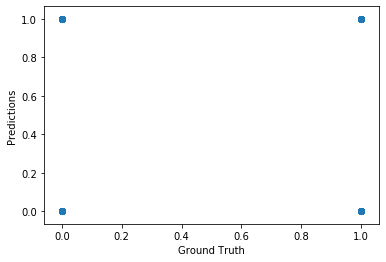

In [60]:
plt.scatter(y_test, predictionsRF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [24]:
#dimensionality reduced data
drData = pd.read_csv('dimensionalityreduction.csv', header=0)
drData.head()

,SEX,EDUCATION,MARRIAGE,PAY,BILL_AMT,PAY_AMT,age_disc,limit_bal_disc_8,default payment next month
0,2,2,1,-0.333333,1284.000000,114.833333,0,0,1
1,2,2,2,0.500000,2846.166667,833.333333,0,0,1
2,2,2,2,0.000000,16942.166670,1836.333333,1,0,0
3,2,2,1,0.000000,38555.666670,1398.000000,1,0,0
4,1,2,1,-0.333333,18223.166670,9841.500000,3,0,0


In [25]:
drData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
PAY                           30000 non-null float64
BILL_AMT                      30000 non-null float64
PAY_AMT                       30000 non-null float64
age_disc                      30000 non-null int64
limit_bal_disc_8              30000 non-null int64
default payment next month    30000 non-null int64
dtypes: float64(3), int64(6)
memory usage: 2.1 MB


In [27]:
#features
drfeatures = drData.iloc[:,0:8]
print('Summary of feature sample')
drfeatures.head()

Summary of feature sample


,SEX,EDUCATION,MARRIAGE,PAY,BILL_AMT,PAY_AMT,age_disc,limit_bal_disc_8
0,2,2,1,-0.333333,1284.000000,114.833333,0,0
1,2,2,2,0.500000,2846.166667,833.333333,0,0
2,2,2,2,0.000000,16942.166670,1836.333333,1,0
3,2,2,1,0.000000,38555.666670,1398.000000,1,0
4,1,2,1,-0.333333,18223.166670,9841.500000,3,0


In [29]:
#dependent variable
drdepVar = drData['default payment next month']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(drfeatures, drdepVar, test_size=0.3)

In [31]:
X_train.shape, X_test.shape

((21000, 8), (9000, 8))

In [26]:
#Classification Models
modelRFdr=RandomForestClassifier()
modelDTdr=tree.DecisionTreeClassifier()
modelKNNdr=neighbors.KNeighborsClassifier()
modelSVMdr=svm.SVC()

In [34]:
modelRFdr.fit(X_train,y_train)
print(cross_val_score(modelRFdr, X_train, y_train))
modelRFdr.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.78760177 0.78671429 0.78154022]


0.971

In [35]:
modelDTdr.fit(X_train,y_train)
print(cross_val_score(modelDTdr, X_train, y_train))
modelDTdr.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.71575489 0.71885714 0.71053008]


0.9936666666666667

In [27]:
modelKNNdr.fit(X_train,y_train)
print(cross_val_score(modelKNNdr, X_train, y_train))
modelKNNdr.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.75246393 0.752      0.75610802]


0.8172380952380952

In [28]:
predictionsKNNdr = modelKNNdr.predict(X_test)
print("KNNdr accuracy : ",accuracy_score(y_test, predictionsKNNdr, normalize = True))

KNNdr accuracy :  0.7607777777777778


In [37]:
modelSVMdr.fit(X_train,y_train)
print(cross_val_score(modelSVMdr, X_train, y_train))
modelSVMdr.score(X_train,y_train)

C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Ginny\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[0.78060277 0.78028571 0.77953993]


0.9860952380952381

In [39]:
pip install eli5

  Created wheel for tabulate: filename=tabulate-0.8.6-cp37-none-any.whl size=23279 sha256=826ead31fd1110b4727a30ad664b91be4641d353662753008da21bbd907f8c98
  Stored in directory: C:\Users\Ginny\AppData\Local\pip\Cache\wheels\9c\9b\f4\eb243fdb89676ec00588e8c54bb54360724c06e7fafe95278e
Successfully built tabulate
Note: you may need to restart the kernel to use updated packages.


In [1]:
eli5.show_weights(modelRF.get_booster())

NameError: name 'eli5' is not defined

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot_importance'

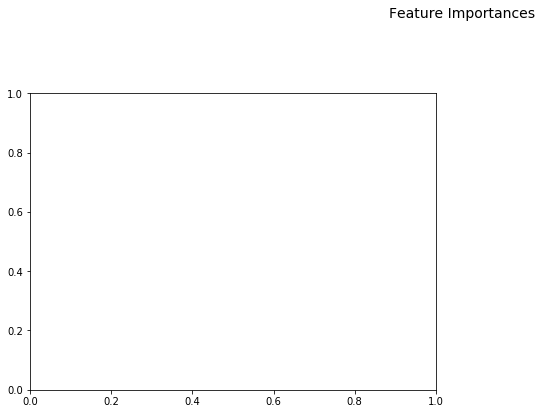

In [20]:
fig = plt.figure(figsize = (16, 12))
title = fig.suptitle("Feature Importances", fontsize=14)

ax1 = fig.add_subplot(2,2, 1)
plt.plot_importance(modelRF, importance_type='weight', ax=ax1)
t=ax1.set_title("Feature Importance - Feature Weight")

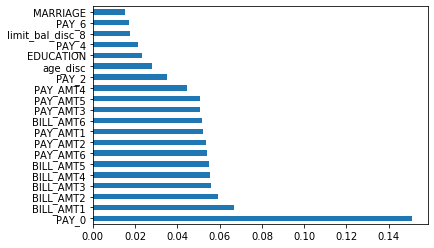

In [27]:
feat_importances = pd.Series(modelRF.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')

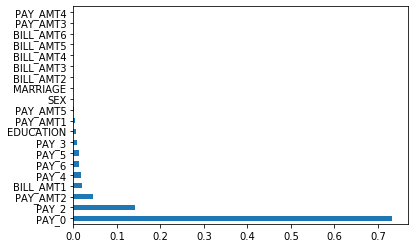

In [25]:
feat_importances = pd.Series(modelDT4.feature_importances_, index=features.columns)
feat_importances.nlargest(20).plot(kind='barh')